# Step 1: Import libraries and the new combined dataset

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing combined dataset

In [2]:
# Set path variable

path = r'C:\Users\HP\Documents\CareerFoundry\Data Immersion\Achievement 4\05-2023 Instacart Basket Analysis'

In [3]:
# Import the dataset

ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
ords_prods_all.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
#Check the size

ords_prods_all.shape

(32404859, 33)

In [6]:
#Check the datatypes

ords_prods_all.dtypes

order_id                          object
user_id                           object
order_number                       int64
orders_day_of_week                 int64
order_hour_of_day                  int64
days_since_last_order            float64
product_id                         int64
add_to_cart_order                  int64
reordered                          int64
product_name                      object
aisle_id                           int64
department_id                      int64
prices                           float64
_merge                          category
price_range_loc                   object
busiest_day                       object
busiest_days                      object
busiest_period_of_day             object
max_order                          int64
loyalty_flag                      object
average_price                    float64
spending_status                   object
median_days_since_last_order     float64
customer_frequency_flag           object
first_name      

# Step 2: Follow the instructions to create a bar chart, histogram, scatterplot, and line chart using a sample subset for the line chart.

## Creating bar charts

<Axes: >

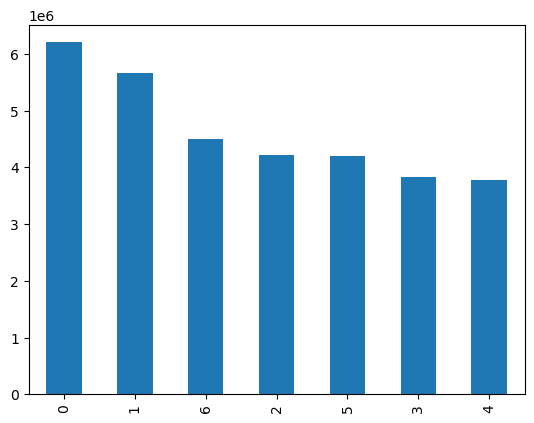

In [7]:
# Create a bar chart with the 'orders_day_of_week' column

ords_prods_all['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

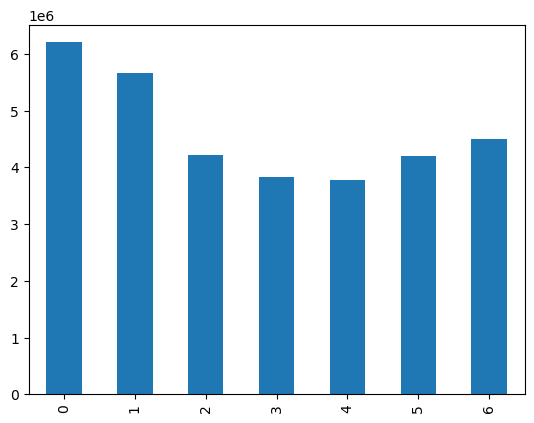

In [8]:
# Sort the bar chart by index order instead

ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

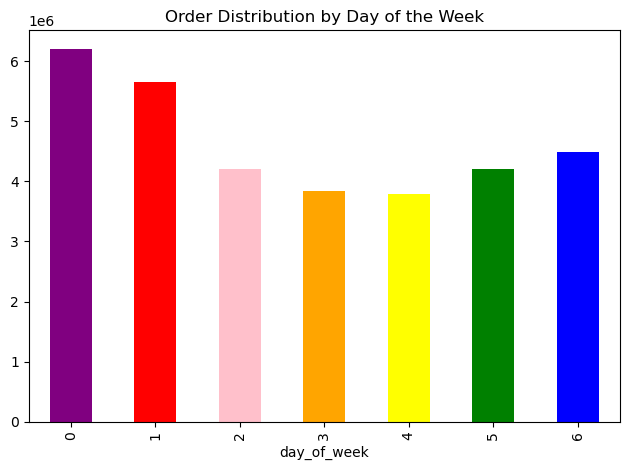

In [9]:
# Add color to bar chart

bar_1 = ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
plt.title('Order Distribution by Day of the Week')
plt.xlabel('day_of_week')
plt.tight_layout()

## Creating Histograms

<Axes: ylabel='Frequency'>

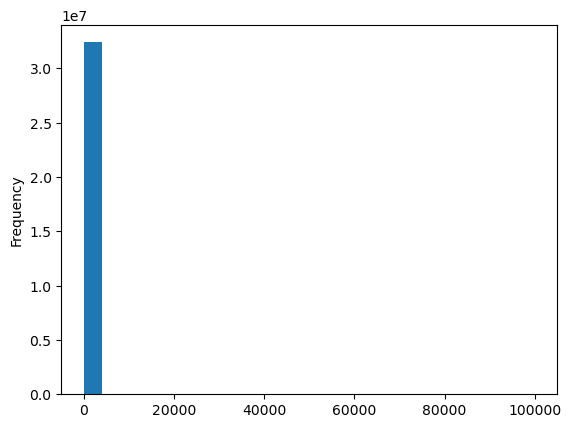

In [10]:
# Creating a histogram of the prices column

ords_prods_all['prices'].plot.hist(bins = 25)

In [11]:
# Investigate why there is only one apparent column

ords_prods_all['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

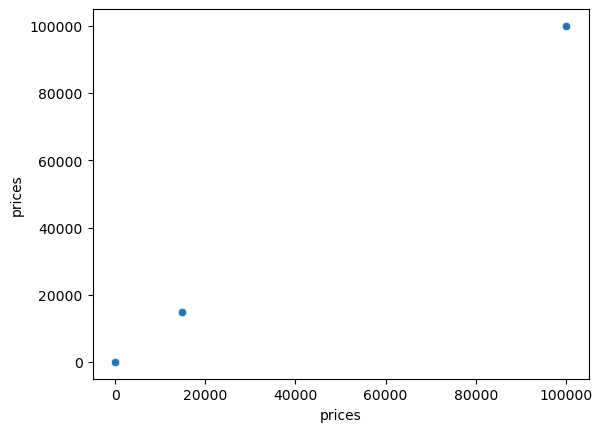

In [12]:
# Create scatterplot to investigate the data more. There's already an outlier with the max value.

sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_all)

In [13]:
# Change all the rows with the outlier prices as NaN's

ords_prods_all.loc[ords_prods_all['prices'] > 100, 'prices'] = np.nan 

In [14]:
# Recheck max to see if there are any outliers left

ords_prods_all['prices'].max()

25.0

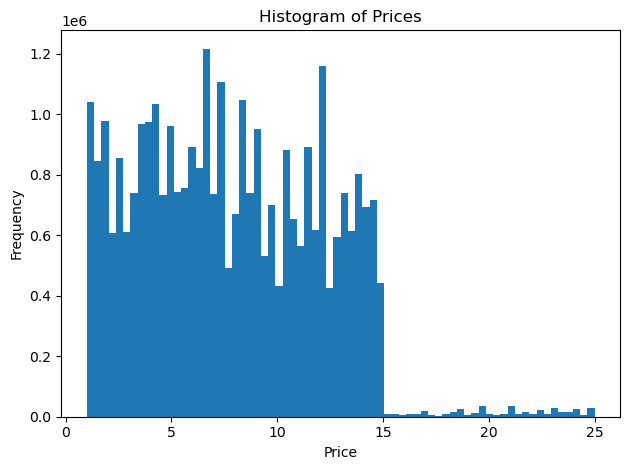

In [15]:
# Redo histogram

hist_1 = ords_prods_all['prices'].plot.hist(bins = 70)

plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.tight_layout()

## Creating Scatterplots

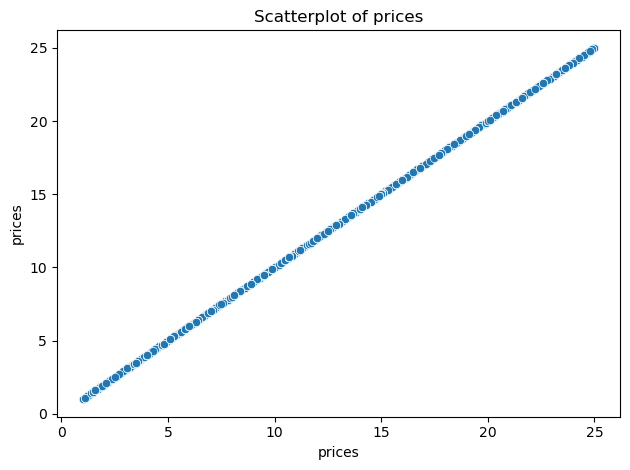

In [16]:
#Create a scatterplot of the 'prices' column

scatterplot_1 = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_all)

plt.title('Scatterplot of prices')
plt.tight_layout()

## Creating a line chart

### Random Sampling

In [17]:
# Set random sampling seed and assign dataframe 'dev' to give each row in the dataframe a number based on this seed

np.random.seed(4)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [18]:
# Check dev

dev

array([False,  True, False, ...,  True,  True,  True])

In [19]:
#Split dataframe into two smaller dataframes 'big' and 'small'

big = ords_prods_all[dev]
small = ords_prods_all[~dev]

In [20]:
#Check length of big and small and compare to length of ords_prods_all

len(big) + len(small)

32404859

In [21]:
len(ords_prods_all)

32404859

### Line Chart

In [22]:
# Make smaller dataframe that only includes necessary columns

df_2 = small[['orders_day_of_week', 'prices']]

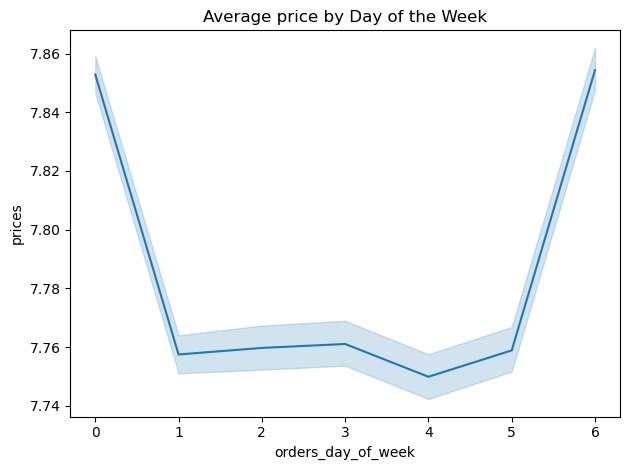

In [23]:
#Create line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

plt.title('Average price by Day of the Week')
plt.tight_layout()

# Step 3: Create a histogram of 'order_hour_of_day' column

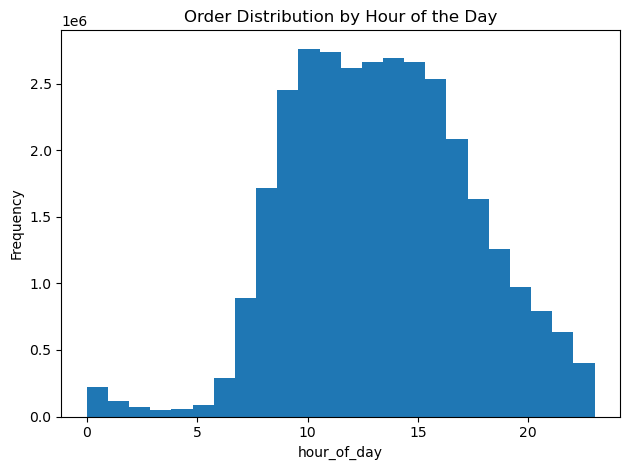

In [24]:
#Create a histogram with 24 bins since there are 24 hours from 0-23

hist_order_hour_of_day = ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

plt.title('Order Distribution by Hour of the Day')
plt.xlabel('hour_of_day')
plt.tight_layout()

#### The histogram shows the frequency of the hours in which customers shopped. The most frequent hours that customers shopping at were between 10 AM and 4 PM. After 4PM, there is a slow dropoff and the least frequent hours are between 12AM and 5AM. After 5AM, business starts ramping up until the peak shopping hours again. 

# Step 4: Create a bar chart from the 'loyalty_flag' column. 

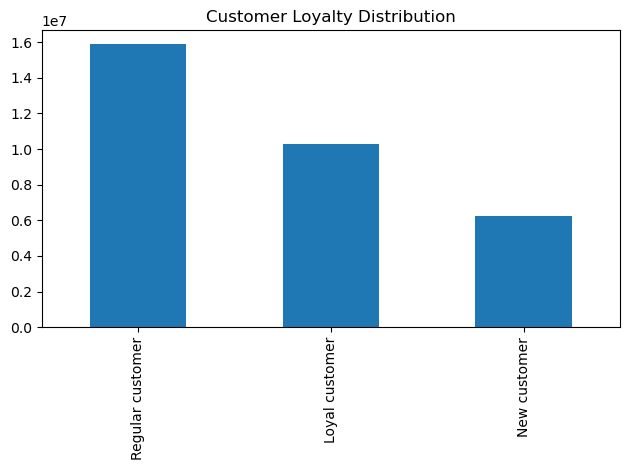

In [25]:
#Create a bar chart using 'loyalty_flag'

bar_loyalty = ords_prods_all['loyalty_flag'].value_counts().plot.bar()

plt.title('Customer Loyalty Distribution')
plt.tight_layout()

# Step 5: Check if there's a difference in expenditure (prices) depending on the hour of the day (use a sample of the data).

In [26]:
# Use 'small' dataframe since it has less values and should compute quicker. It's been proven to be an accurate representation
# Create a subset of the 'small' dataframe with only the relevant values

df_line_order_hour_of_day = small[['order_hour_of_day', 'prices']]

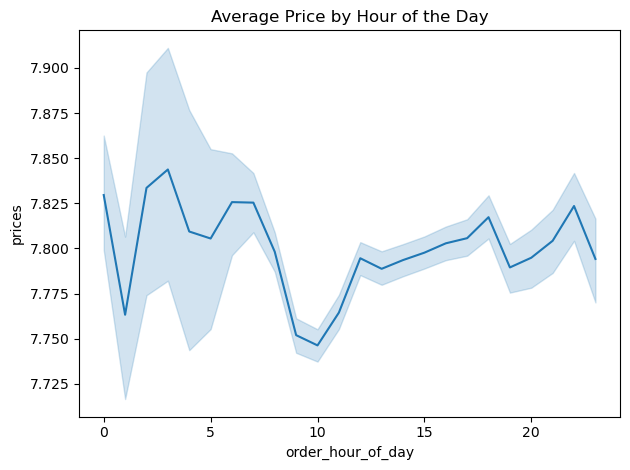

In [27]:
line_order_hour_of_day = sns.lineplot(data = df_line_order_hour_of_day, x = 'order_hour_of_day', y = 'prices')

plt.title('Average Price by Hour of the Day')
plt.tight_layout()

#### Prices do fluctuate slightly throughout the day but the fluctuation is small (less than 20 cents).

# Step 6: Determine whether there's a connection between age and family situation by creating a line chart between age and number of dependents

In [28]:
#Create a subset with only age and number of dependents

df_age_dependants = small[['age', 'number_of_dependants']]

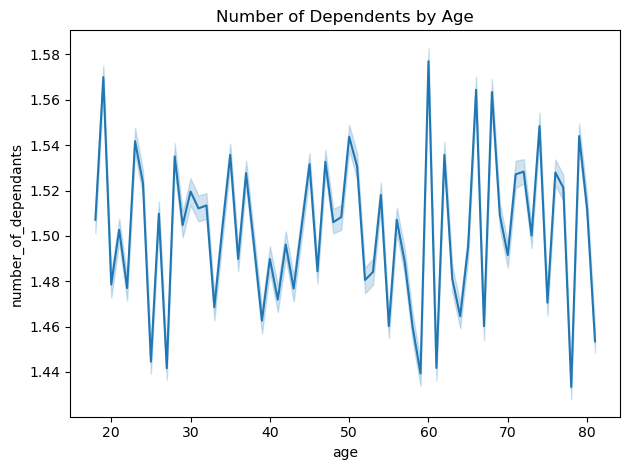

In [29]:
#Create lineplot

line_age_dependents = sns.lineplot(data = df_age_dependants, x = 'age', y = 'number_of_dependants')

plt.title('Number of Dependents by Age')
plt.tight_layout()

#### There doesn't seem to be any significant correlation between age and number of dependants for the dataset. If there was a significant correlation, I would expected to see a general increase or general decrease in the line plot but the number of the dependants doesn't seem to change much regardless of age. 

# Step 7: Create a scatterplot to see if there's a connection between age and spending power (income).

In [30]:
#Create a subset with only age and income

df_age_income = small[['age', 'income']]

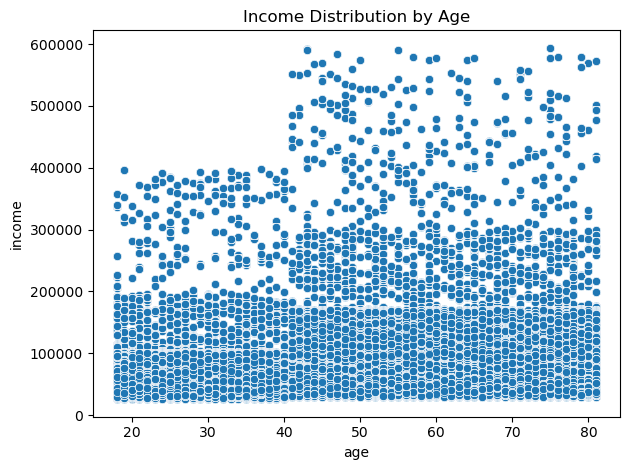

In [31]:
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

plt.title('Income Distribution by Age')
plt.tight_layout()

#### There is a distinct jump in income around the 40 year age mark. Between the ages of 20 and 40, no customers make over 400,000 but above 40 years old there are customers that make up to 600,000. However, the vast majority of customers make less than 200,000, with most of them making below 100,000. There are significantly more people in the 200,000 to 300,000 income region for the 40+ age group compared to those between 20 and 40 years old. However, more significant testing should be conducted to determine whether or not age is stricly correlated with income. The amount of people making above 200,000 may not be significant if there's much more people below the 200,000 mark that aren't visible on this scatterplot.

# Step 8: Export your visualizations as '.png' files.

In [32]:
# Export bar_1

bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_day_of_week.png'))

In [33]:
# Export hist_1

hist_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [34]:
# Export scatterplot_1

scatterplot_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_prices.png'))

In [35]:
# Export line

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'lineplot_ords_dow_prices.png'))

In [36]:
# Export hist_order_hour_of_day

hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

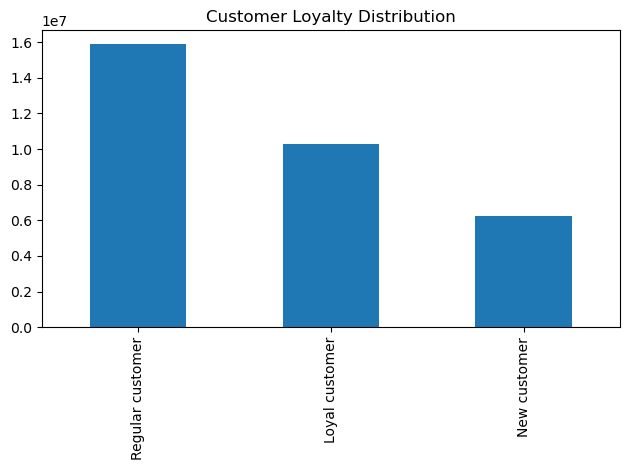

In [42]:
#Change bar_loyalty image size

bar_loyalty = ords_prods_all['loyalty_flag'].value_counts().plot.bar()

plt.title('Customer Loyalty Distribution')
plt.tight_layout()

In [43]:
# Export bar_loyalty

bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

In [39]:
# Export line_order_hour_of_day

line_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour_of_day.png'))

In [40]:
# Export line_age_dependants

line_age_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))

In [41]:
# Export scatterplot_age_income

scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))

In [44]:
ords_prods_all['price_range_loc'].value_counts(dropna = False)

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64